In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [2]:
df = pd.read_csv("kidney_disease.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
for col in df.columns.tolist():
    print('----- %s -----' %col)
    print(df[col].value_counts())
    print()

----- id -----
0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: id, Length: 400, dtype: int64

----- age -----
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64

----- bp -----
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64

----- sg -----
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64

----- al -----
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64

----- su -----
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: su, dtype: int64

----- rbc -----
normal      201
abnormal     47
Name: rbc, dtype: int64

----- pc -----
normal      259
abnormal     76
Name: pc, dtype: int64

----- pcc -----
notpresent    354
present       

In [4]:
df.drop('id', axis=1, inplace=True)

In [5]:
len(df.columns.tolist())

25

In [6]:
len(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class'])

25

In [7]:
# renaming the columns name


df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [8]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [9]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype and have 'NaN' entries -- Treating both

In [11]:
# converting columns data types

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [12]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [13]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [14]:
# looking for the available types of data in each columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



We have some ambiguity in the columns 'diabetes_mellitus', 'coronary_artery' and 'class'.

In [15]:
# replacing the incorrect values


df['diabetes_mellitus'].replace(to_replace = {'\tno' : 'no', '\tyes' : 'yes', 'yes' : 'yes'}, inplace= True)

df[ 'coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no')

df['class'] = df['class'].replace(to_replace = {'ckd\t' : 'ckd', 'notckd' : 'not ckd'})

In [16]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'not ckd'] values



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [19]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [24]:
df['class'].value_counts()

0    250
1    150
Name: class, dtype: int64

In [25]:
len(num_cols)

14

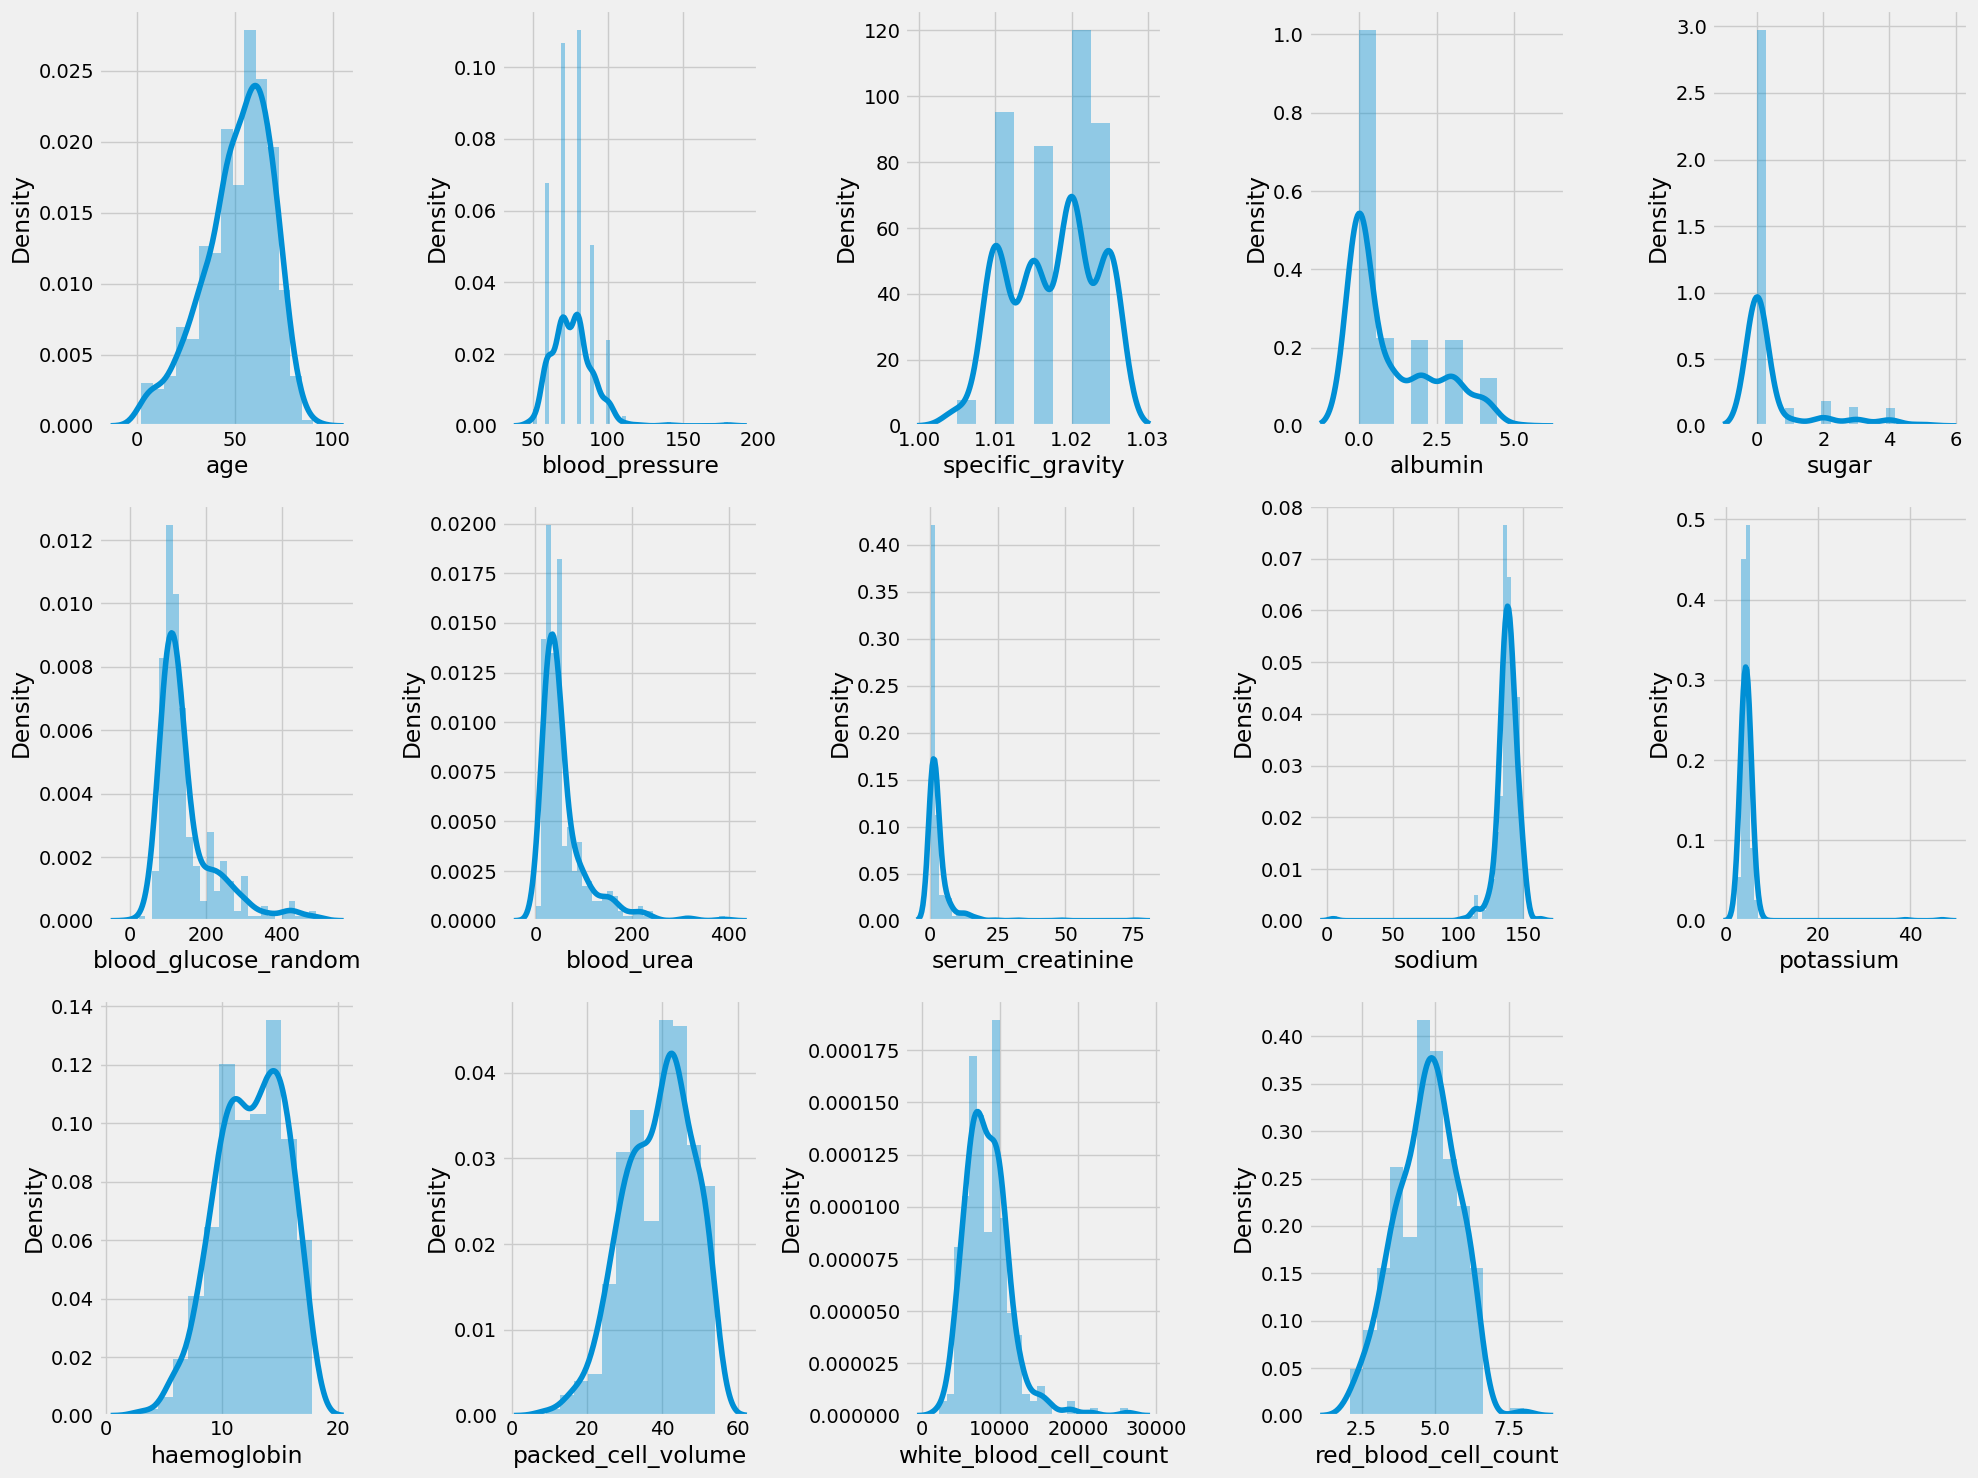

In [26]:
# checking features distribution for the numerical columns

plt.figure(figsize=(20, 15))
plotnumber = 1

for col in num_cols:
    if plotnumber <= len(num_cols):
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    
    plotnumber +=1
    
plt.tight_layout()
plt.show()

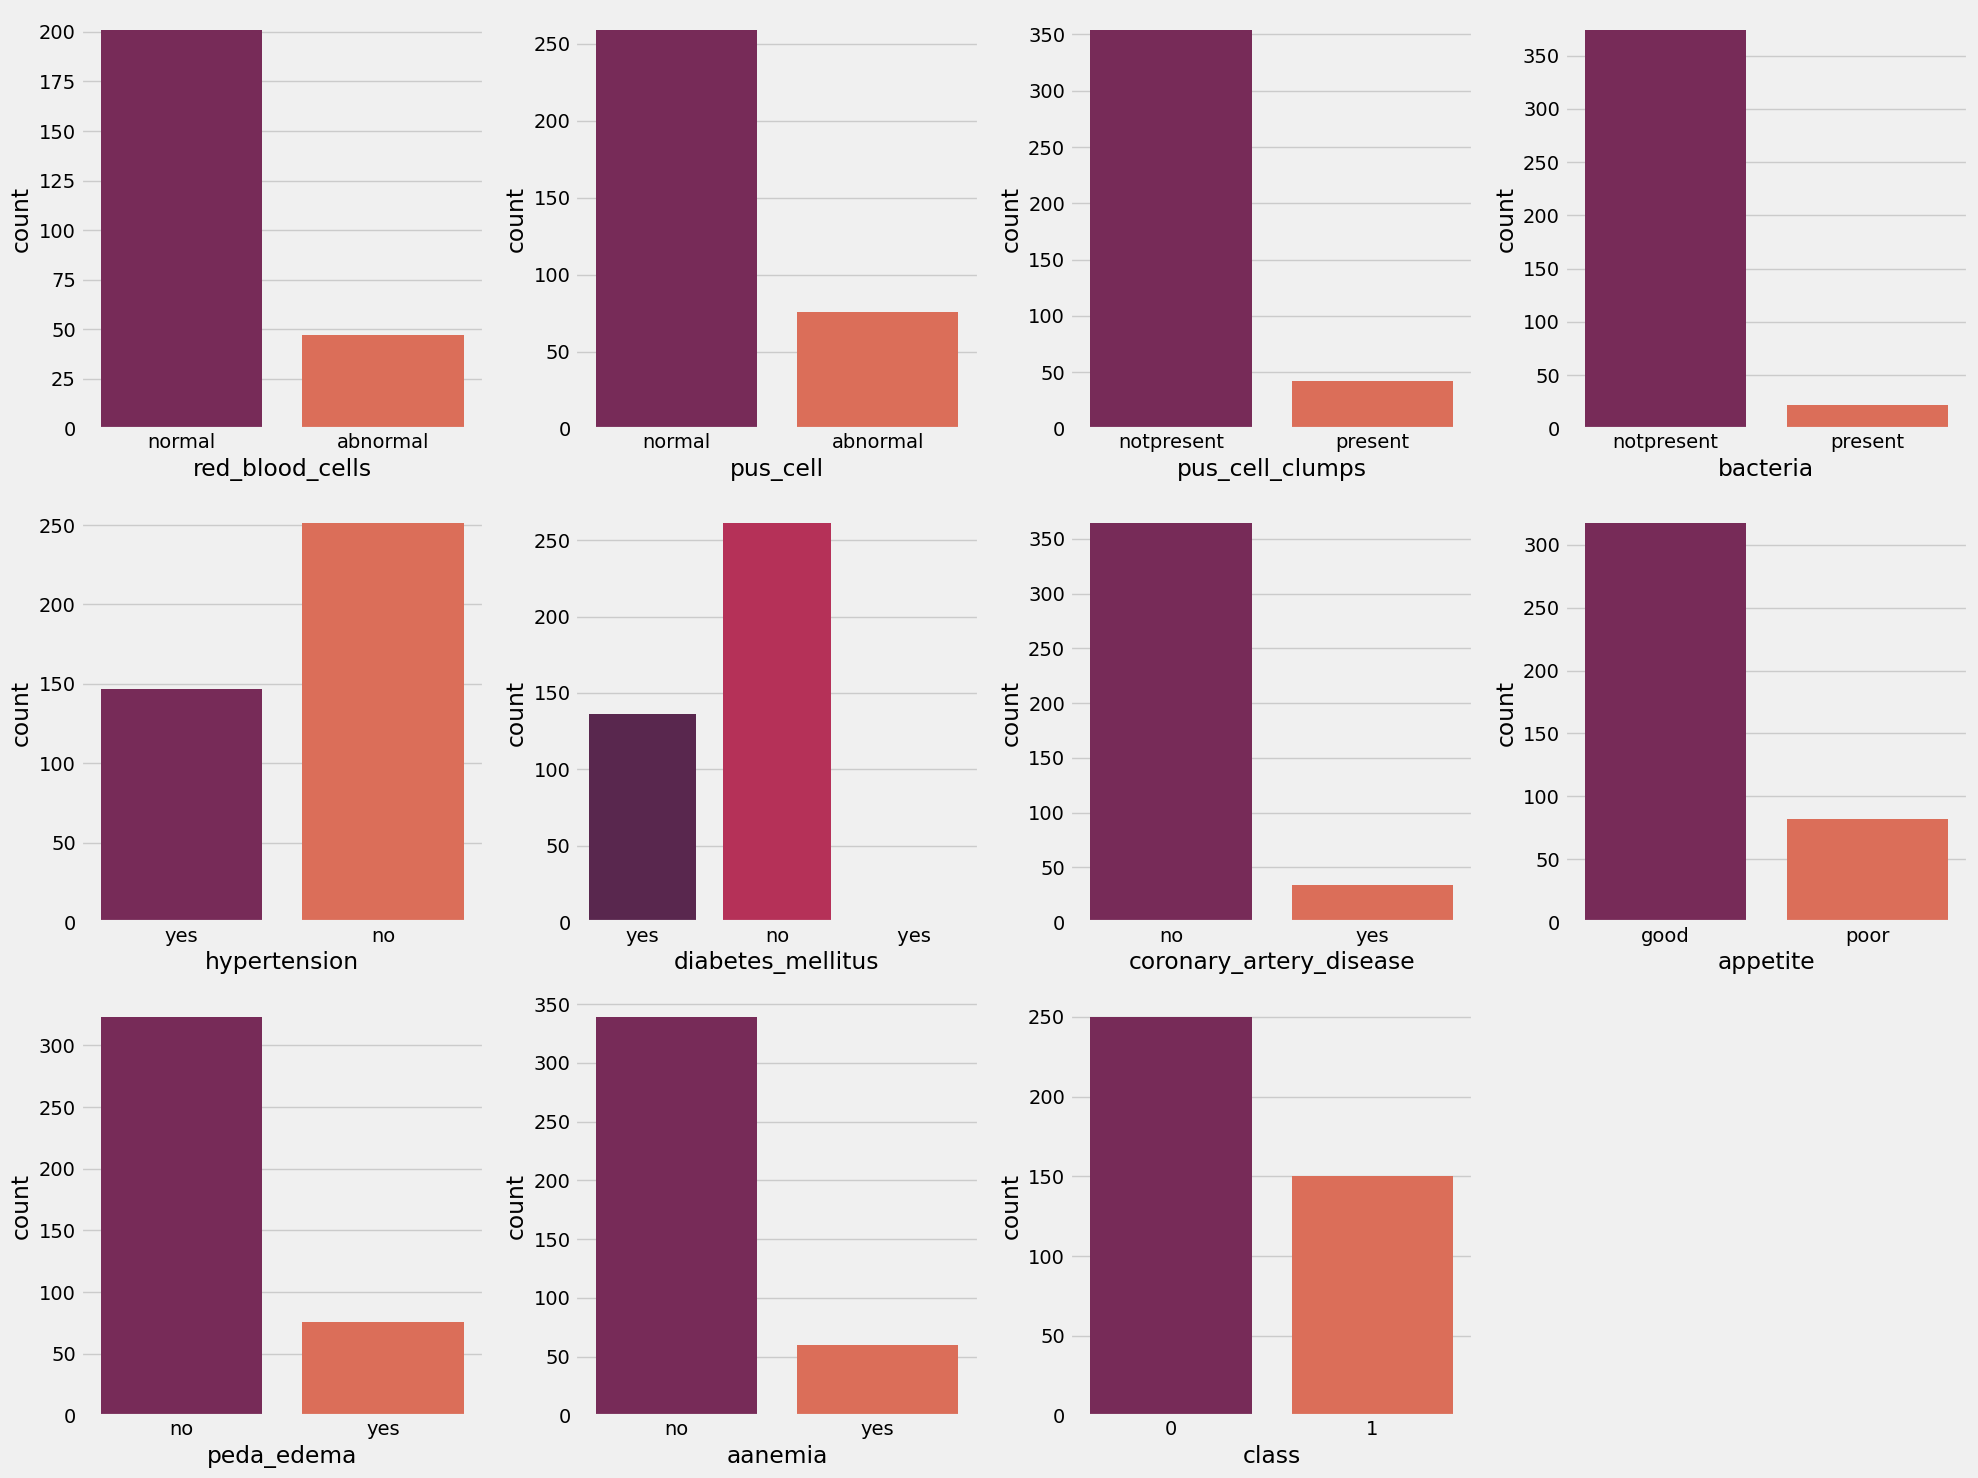

In [33]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for col in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x=df[col], palette = 'rocket')
        plt.xlabel(col)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

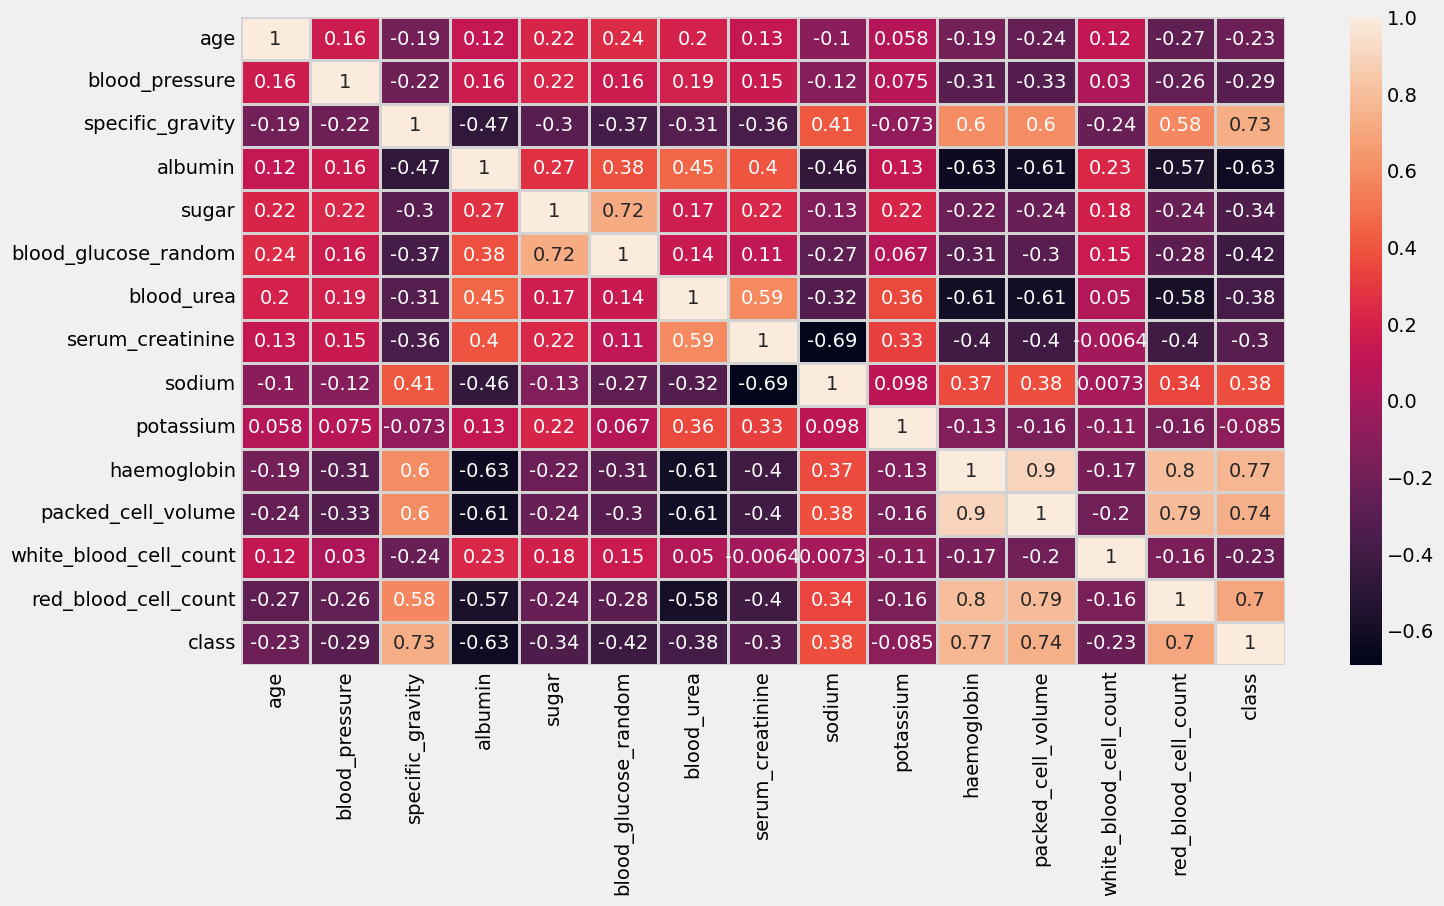

In [34]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()